In [50]:
# EDA of audio sample to see limits of accuracy of DFT and FFT in python3 
# and identify the limits of audio resolution produced by common recording 
# media (presumably predominantly mobile phones)

In [51]:
# link to audio sample: https://xeno-canto.org/824126
# name: XC824126-Agapornis-swindernianus.mp3

In [52]:
# read in audio sample
import wave
audio_sample = wave.open('XC824126-Agapornis-swindernianus.wav')

In [53]:
# check audio parameters
sample_rate = audio_sample.getframerate()
number_channels = audio_sample.getnchannels()
number_samples = audio_sample.getnframes()
duration = number_samples / sample_rate

print('sample-rate:',  sample_rate,
      ' number-channels:', number_channels, 
      ' number_samples:', number_samples,
      ' duration:', duration)

sample-rate: 44100  number-channels: 2  number_samples: 715817  duration: 16.231678004535148


In [54]:
# generate array from numpy
import numpy as np
sig_wav = audio_sample.readframes(audio_sample.getnframes())
sig_arr = np.frombuffer(sig_wav, dtype=np.int16)

# get right channel
r_chan = sig_arr[1::2]

# creat ts array
tim_stp = np.linspace(0, duration, num=number_samples)

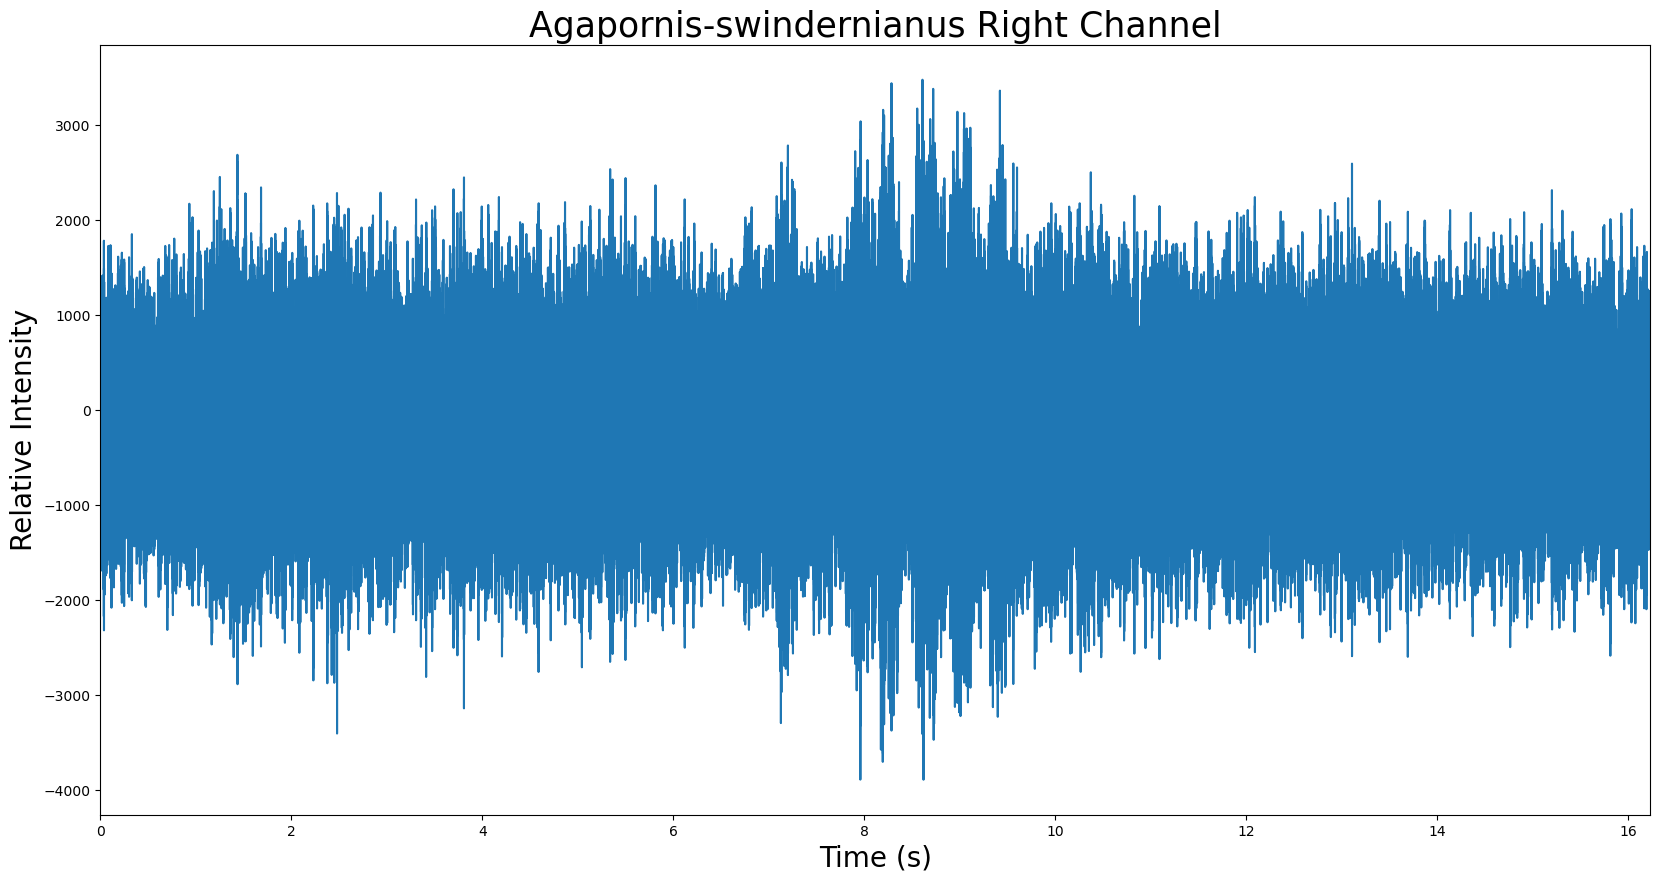

In [55]:
# plot right channel signal as function of time
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(tim_stp, r_chan)
plt.title('Agapornis-swindernianus Right Channel',
         fontsize=25)
plt.ylabel('Relative Intensity',
          fontsize=20)
plt.xlabel('Time (s)',
          fontsize=20)
plt.xlim(0, duration)
plt.show()

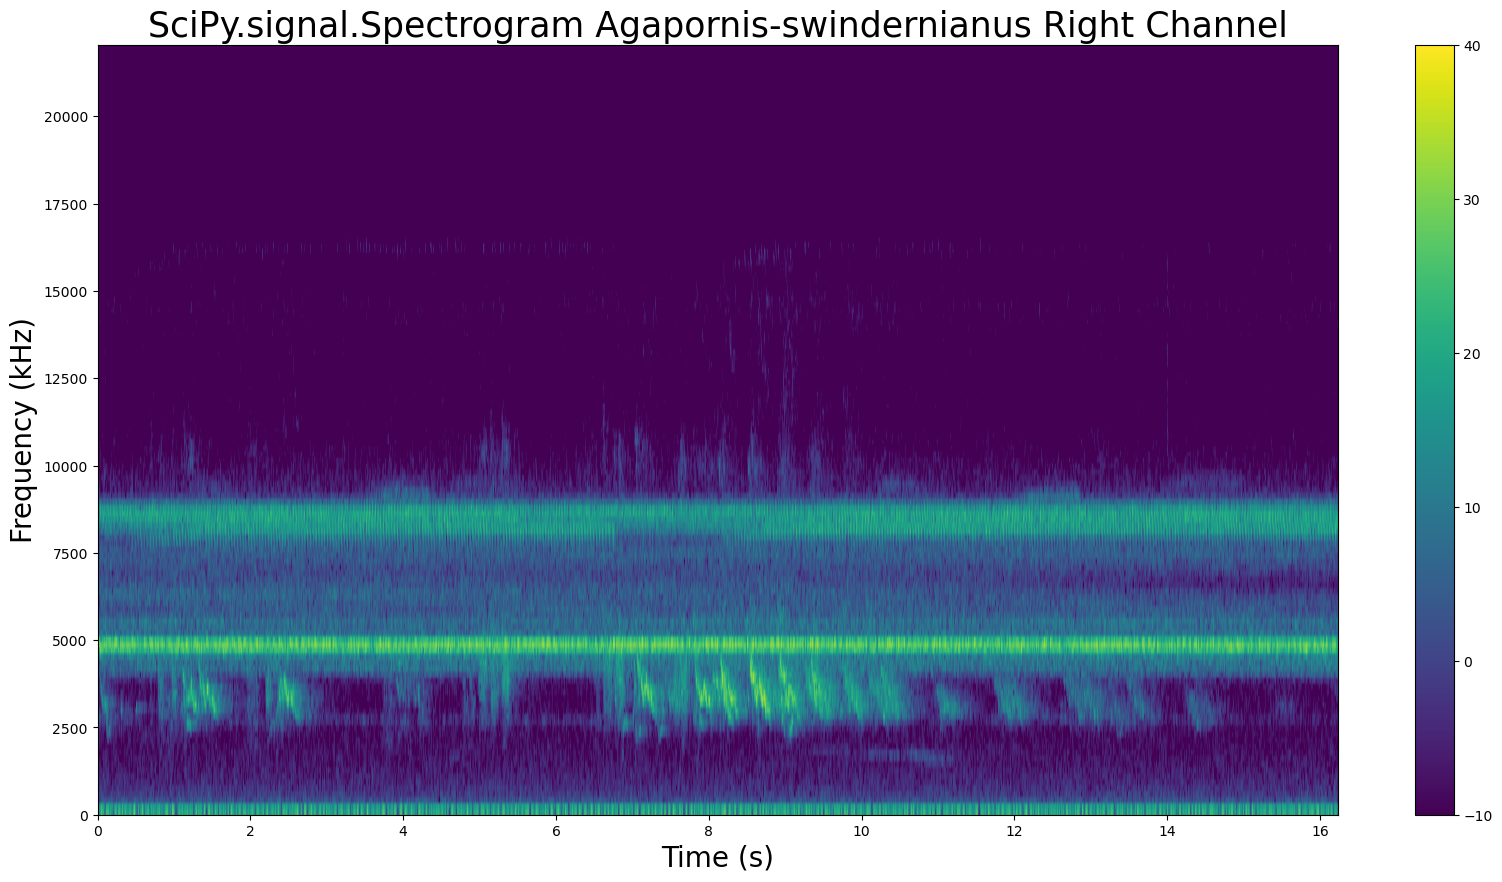

In [56]:
# plot spectrograph for comaprrison with FFT
plt.figure(figsize=(20,10))
plt.specgram(r_chan, Fs=sample_rate, vmin=-10, vmax=40)
plt.title('SciPy.signal.Spectrogram Agapornis-swindernianus Right Channel',
         fontsize=25)
plt.xlabel('Time (s)',
          fontsize=20)
plt.ylabel('Frequency (kHz)',
          fontsize=20)
plt.xlim(0, duration)
plt.colorbar()
plt.show()

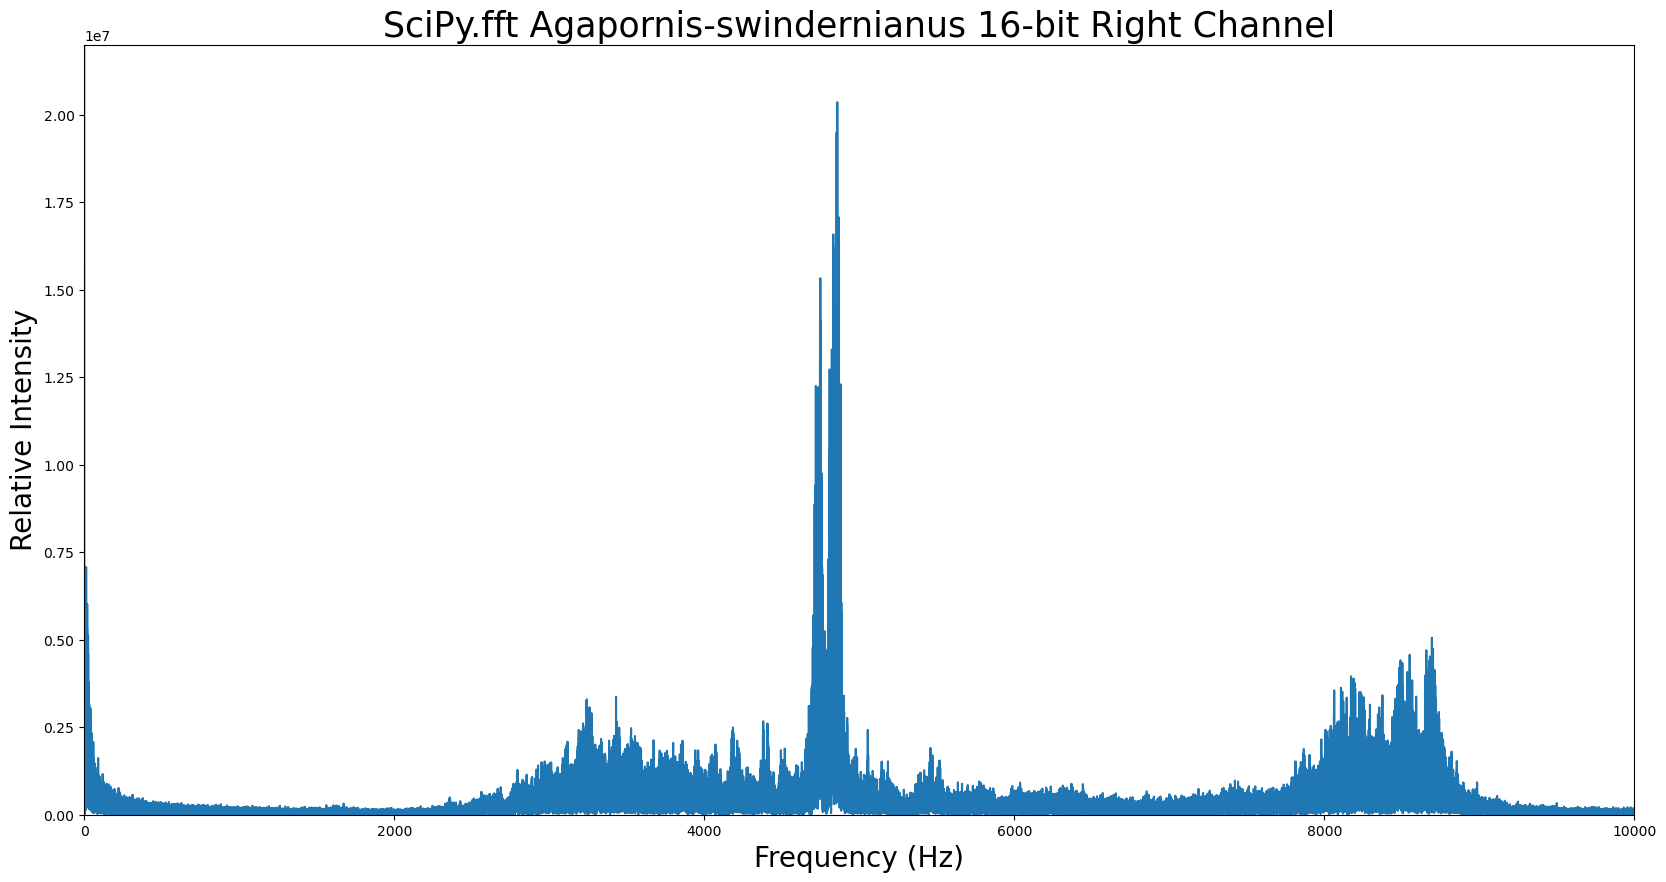

In [57]:
# plot FFT for comparrison to determine NR strategy
import scipy
from scipy.fft import fft, rfft, fftfreq, rfftfreq
yr = rfft(r_chan)
xr = rfftfreq(number_samples, 1/sample_rate)
plt.figure(figsize=(20,10))
plt.plot(xr, np.abs(yr))
plt.title('SciPy.fft Agapornis-swindernianus 16-bit Right Channel',
          fontsize=25)
plt.ylabel('Relative Intensity',
          fontsize=20)
plt.xlabel('Frequency (Hz)',
          fontsize=20)
plt.ylim(0, 0.22e8)
plt.xlim(0, 10000)
plt.show()